In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# To load the environment variable defined in the .env file
from dotenv import load_dotenv
load_dotenv();

In [3]:
import pandas as pd
import src.data.NHLDataManager as DataManager
data_manager = DataManager.NHLDataManager()

In [4]:
shot_types = ['Tip-In', 'Wrist Shot', 'Snap Shot', 'Backhand', 'Slap Shot']
game_numbers = data_manager.get_number_of_games(2016, "Regular")
goals_and_shots = pd.DataFrame()
for game in game_numbers:
    goals_and_shots = pd.concat([goals_and_shots, data_manager.get_goals_and_shots_df(2016, "Regular", game)[["Type", "Shot Type"]]])
goals_and_shots.head()

,Type,Shot Type
0,GOAL,Wrist Shot
1,GOAL,Backhand
2,GOAL,Slap Shot
3,GOAL,Snap Shot
4,GOAL,Wrist Shot


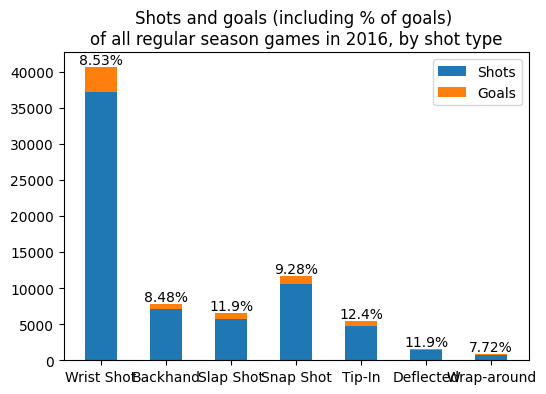

In [123]:
# Q1

import matplotlib.pyplot as plt
from collections import Counter

# filter out NaN values
goals_and_shots = goals_and_shots.dropna()
labels = goals_and_shots["Shot Type"].unique()[:4] # not sure which shot types are to be kept?

# Grab counts
shots = goals_and_shots[goals_and_shots["Type"] == "SHOT"]
goals = goals_and_shots[goals_and_shots["Type"] == "GOAL"]
shot_counts = Counter(shots["Shot Type"])
goal_counts = Counter(goals["Shot Type"])
shot_counts_filtered = []
goal_counts_filtered = []
for l in labels:
    shot_counts_filtered.append(shot_counts[l])
    goal_counts_filtered.append(goal_counts[l])
    

fig, ax = plt.subplots(figsize=(6, 4))
p1 = ax.bar(labels, shot_counts_filtered, width=0.5, label='Shots')
p2 = ax.bar(labels, goal_counts_filtered, width=0.5, bottom=shot_counts_filtered, label='Goals')
# bars = ax.barh(labels, [goal_counts_filtered[i]/(shot_counts_filtered[i]+goal_counts_filtered[i]) for i in range(len(labels))])
# for bars in ax.containers:
#     ax.bar_label(bars)
plt.bar_label(p2, labels=[f"{(goal_counts_filtered[i]/(shot_counts_filtered[i]+goal_counts_filtered[i]))*100:.3}%" for i in range(len(labels))])
plt.title("Shots and goals (including % of goals) \nof all regular season games in 2016, by shot type")
plt.legend()
plt.show()

In [5]:
from tqdm.auto import tqdm

# Q2
shots_by_season = []
skipped = 0
for season in [2018, 2019, 2020]:
    for season_type in ("Regular", "Playoffs"):
        distance_data = pd.DataFrame()
        game_numbers = data_manager.get_number_of_games(season, season_type)
        for game in tqdm(game_numbers):
            try:
                distance_data = pd.concat([distance_data, data_manager.get_goals_and_shots_df_standardised(season, season_type, game)[["Type", "st_x", "st_y"]]])
            except:
                # Sometimes the rinkSide isn't provided...
                # For now we could skip it?
                skipped += 1
                continue
        shots_by_season.append(distance_data)
print(f"Skipped games: {skipped}")

  0%|          | 0/1271 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/1271 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/1271 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

Skipped games: 764


In [23]:
import matplotlib.pyplot as plt

lol = shots_by_season[0]
lol[lol["Type"] == "GOAL"].iloc[:,1:3]
# Goal is located at (89, 0)

,st_x,st_y
0,87.0,-3.0
1,64.0,14.0
2,63.0,5.0
3,53.0,-7.0
4,74.0,4.0
...,...,...
2,82.0,2.0
3,81.0,-2.0
4,65.0,5.0
5,71.0,-9.0
